In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math

%matplotlib inline

fontsize = 16
font = {'size': fontsize}
matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('axes', linewidth=1)
matplotlib.rc('xtick.major', width=1)
matplotlib.rc('ytick.major', width=1)

In [2]:
import pySpheCow

In [3]:
r = np.logspace(-2.0, 2.0, 401)
gammas = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
dics = []
for gamma in gammas:
    params = {"Mtot": 1.0, "b": 1.0, "gamma": gamma}
    ra = 0.5
    print("Running gamma model for gamma = ", gamma)
    dic = pySpheCow.run_model("GammaModel", params, ra, r)
    dics.append(dic)

Running gamma model for gamma =  0.0
Running gamma model for gamma =  0.5
Running gamma model for gamma =  1.0
Running gamma model for gamma =  1.5
Running gamma model for gamma =  2.0
Running gamma model for gamma =  2.5


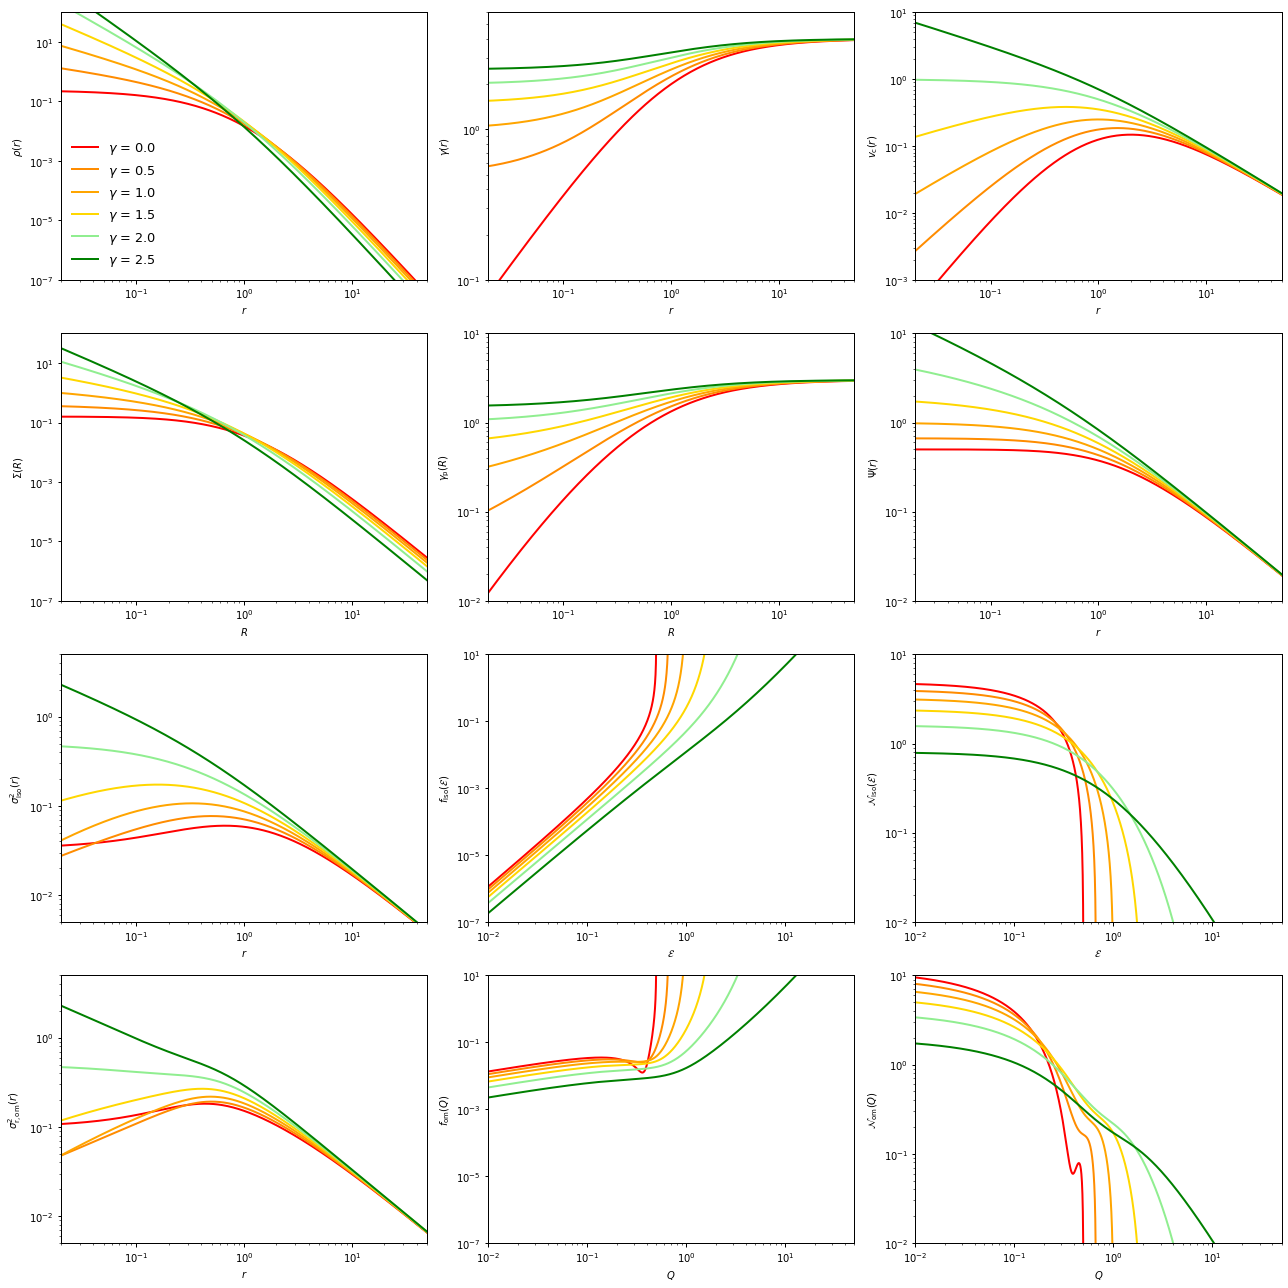

In [4]:
figure, axes = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(18,18))
colors = ['red', 'darkorange', 'orange', 'gold', 'lightgreen', 'green']

# plot the data

for gamma, dic, color in zip(gammas, dics, colors):
    label = r'$\gamma$ = ' + str(gamma)
    r = dic['radius']
    rho = dic['density']
    gamma = dic['density_slope']
    vc = dic['circular_velocity']
    Sigma = dic['surface_density']
    gammap = dic['surface_density_slope']
    Psi = dic['potential']
    sigma2_iso = dic['isotropic_dispersion']
    df_iso = dic['isotropic_distribution_function']
    ded_iso = dic['isotropic_differential_energy_distribution']
    sigmar2_om = dic['osipkov_merritt_radial_dispersion']
    df_om = dic['osipkov_merritt_distribution_function']
    ded_om = dic['osipkov_merritt_pseudo_differential_energy_distribution']

    axes[0,0].plot(r, rho, color=color, linewidth=2, linestyle='-', label=label)
    axes[0,1].plot(r, gamma, color=color, linewidth=2, linestyle='-')
    axes[0,2].plot(r, vc, color=color, linewidth=2, linestyle='-')
    axes[1,0].plot(r, Sigma, color=color, linewidth=2, linestyle='-')
    axes[1,1].plot(r, gammap, color=color, linewidth=2, linestyle='-')
    axes[1,2].plot(r, Psi, color=color, linewidth=2, linestyle='-')
    axes[2,0].plot(r, sigma2_iso, color=color, linewidth=2, linestyle='-')
    axes[2,1].plot(Psi, df_iso, color=color, linewidth=2, linestyle='-', label=label)
    axes[2,2].plot(Psi, ded_iso, color=color, linewidth=2, linestyle='-')
    axes[3,0].plot(r, sigmar2_om, color=color, linewidth=2, linestyle='-')
    axes[3,1].plot(Psi, df_om, color=color, linewidth=2, linestyle='-')
    axes[3,2].plot(Psi, ded_om, color=color, linewidth=2, linestyle='-')

# plot parameters

axes[0,0].set_ylim([1e-7,1e2])
axes[0,1].set_ylim([1e-1,6])
axes[0,2].set_ylim([1e-3,1e1])
axes[1,0].set_ylim([1e-7,1e2])
axes[1,1].set_ylim([1e-2,1e1])
axes[1,2].set_ylim([1e-2,1e1])
axes[2,0].set_ylim([5e-3,5e0])
axes[2,1].set_ylim([1e-7,1e1])
axes[2,2].set_ylim([1e-2,1e1])
axes[3,0].set_ylim([5e-3,5e0])
axes[3,1].set_ylim([1e-7,1e1])
axes[3,2].set_ylim([1e-2,1e1])

axes[0,0].legend(fontsize=0.8*fontsize, ncol=1, frameon=False, loc='lower left', numpoints=1)

axes[0,0].set_ylabel(r'$\rho(r)$')
axes[0,1].set_ylabel(r'$\gamma(r)$')
axes[0,2].set_ylabel(r'$v_{\rm{c}}(r)$')
axes[1,0].set_ylabel(r'$\Sigma(R)$')
axes[1,1].set_ylabel(r'$\gamma_{\rm{p}}(R)$')
axes[1,2].set_ylabel(r'$\Psi(r)$')
axes[2,0].set_ylabel(r'$\sigma^2_{\rm{iso}}(r)$')
axes[2,1].set_ylabel(r'$f_{\rm{iso}}({\cal{E}})$')
axes[2,2].set_ylabel(r'${\cal{N}}_{\rm{iso}}({\cal{E}})$')
axes[3,0].set_ylabel(r'$\sigma^2_{\rm{r,om}}(r)$')
axes[3,1].set_ylabel(r'$f_{\rm{om}}(Q)$')
axes[3,2].set_ylabel(r'${\cal{N}}_{\rm{om}}(Q)$')

for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1/50,50])
    ax.set_xlabel(r'$r$')
axes[1,0].set_xlabel('$R$')
axes[1,1].set_xlabel('$R$')
for ax in axes[2,1:3].flatten():
    ax.set_xlim([1e-2,5e1])
    ax.set_xlabel(r'${\cal{E}}$')
for ax in axes[3,1:3].flatten():
    ax.set_xlim([1e-2,5e1])
    ax.set_xlabel(r'$Q$')

# save plot
    
plt.tight_layout()
plt.savefig("Gamma.pdf", bbox_inches='tight', pad_inches=0.03)